In [1]:
# Rifqi Ahmad Fauzi (1301174321)
# SIDE-40-GAB01
# Based on https://youtu.be/1XqG0kaJVHY

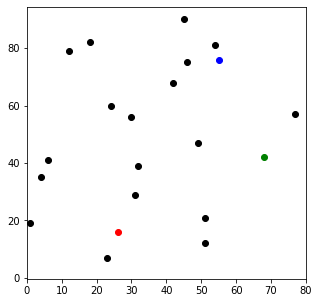

In [2]:
# Inisialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.DataFrame({
    'x': [23, 51, 31, 4, 6, 77, 42, 46, 54, 45, 98, 1, 51, 32, 49, 30, 24, 12, 18],
    'y': [7, 12, 29, 35, 41, 57, 68, 75, 81, 90, 4, 19, 21, 39, 47, 56, 60, 79, 82]
})

np.random.seed(200)
k = 3
# Centroids[i] = [x, y]
centroids = {
    i + 1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize = (5, 5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {
    1: 'r',
    2: 'g',
    3: 'b'
}
for i in centroids.keys():
    plt.scatter( * centroids[i], color = colmap[i])
plt.xlim(0, 80)
plt.xlim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  23   7         9.486833        57.008771        76.059187        1     r
1  51  12        25.317978        34.481879        64.124878        1     r
2  31  29        13.928388        39.217343        52.773099        1     r
3   4  35        29.068884        64.381674        65.436993        1     r
4   6  41        32.015621        62.008064        60.216277        1     r


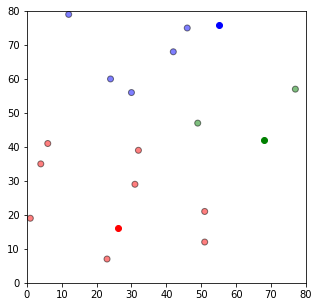

In [3]:
# Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[: , centroid_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize = (5, 5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter( * centroids[i], color = colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

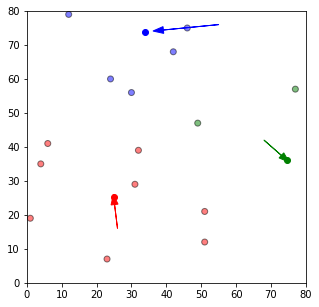

In [4]:
# Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return k
centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

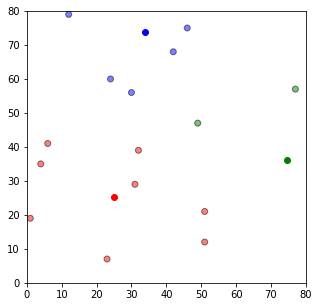

In [5]:
# Repeat assignment stage

df = assignment(df, centroids)

# Plot result
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [6]:
df = pd.DataFrame({
    'x': [23, 51, 31, 4, 6, 77, 42, 46, 54, 45, 98, 1, 51, 32, 49, 30, 24, 12, 18],
    'y': [7, 12, 29, 35, 41, 57, 68, 75, 81, 90, 4, 19, 21, 39, 47, 56, 60, 79, 82]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

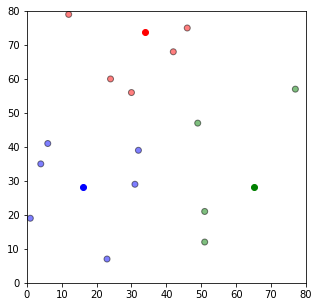

In [8]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)
color1 = list(colors)
plt.scatter(df['x'], df['y'], color=color1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()